### Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
### Import Data

In [5]:
data = pd.read_csv("Uber_Request_Data.csv")

### Print Columns and Rows

In [6]:
print(data.shape)

(6745, 6)


### Change Column Names

In [7]:
data.columns = ['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

### Convert timestamp datatype to object

In [8]:
data["Request_Timestamp"] = pd.to_datetime(data["Request_Timestamp"])

### Fetch hour from the timestamp to plot time slots

In [9]:
data["Request_Hour"] = data["Request_Timestamp"].dt.hour

In [10]:
data["Drop_Timestamp"] = pd.to_datetime(data["Drop_Timestamp"])

In [11]:
data["Drop_Hour"] = data["Drop_Timestamp"].dt.hour

### Delete Request Timestamp and Drop Timestamp columns

In [12]:
data.drop(['Request_Timestamp', 'Drop_Timestamp'], axis='columns', inplace=True)

In [13]:
print(data)

      Request_ID Pickup_Point  Driver_ID             Status  Request_Hour  \
0            619      Airport        1.0     Trip Completed            11   
1            867      Airport        1.0     Trip Completed            17   
2           1807         City        1.0     Trip Completed             9   
3           2532      Airport        1.0     Trip Completed            21   
4           3112         City        1.0     Trip Completed             8   
...          ...          ...        ...                ...           ...   
6740        6745         City        NaN  No Cars Available            23   
6741        6752      Airport        NaN  No Cars Available            23   
6742        6751         City        NaN  No Cars Available            23   
6743        6754         City        NaN  No Cars Available            23   
6744        6753      Airport        NaN  No Cars Available            23   

      Drop_Hour  
0          13.0  
1          18.0  
2           9.0  
3  

### Filter all the cancelled trips from the data

In [14]:
cancelled_trips = data[data['Status'] == 'Cancelled']

In [15]:
print(cancelled_trips.shape)

(1264, 6)


### Filter all the trips where cars were not available from the data

In [16]:
no_cars_available = data[data['Status'] == 'No Cars Available']

In [17]:
print(no_cars_available.shape)

(2650, 6)


### Filter all the completed trips from the data

In [18]:
completed_trips = data[data['Status'] == 'Trip Completed']

In [19]:
print(completed_trips.shape)

(2831, 6)


In [20]:
print(cancelled_trips.value_counts())

Series([], dtype: int64)


### Plot a pie chart to show the number of trips of each type

In [21]:
y = np.array([1264, 2650, 2831])

In [22]:
statuslabels = ["Cancelled", "No Cars Available", "Trip Completed"]

([<matplotlib.patches.Wedge at 0x7f0f4176a050>,
 [Text(0.9148122117335421, 0.6108343615606322, 'Cancelled'),
  Text(-0.8197978372292601, 0.7334381405914392, 'No Cars Available'),
  Text(0.27450168572516787, -1.0651989600699212, 'Trip Completed')],
 [Text(0.49898847912738653, 0.3331823790330721, '18.74%'),
  Text(-0.44716245667050547, 0.40005716759533044, '39.29%'),
  Text(0.1497281922137279, -0.5810176145835932, '41.97%')])

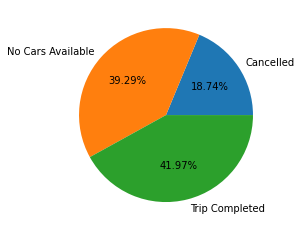

In [23]:
plt.pie(y, labels = statuslabels, autopct = '%2.2f%%')

### Plot a bar chart to show the supply demand gap

In [24]:
x = ["Supply", "Demand"]

In [25]:
y = np.array([2831, 6745])

([<matplotlib.patches.Wedge at 0x7f0f415e1f10>,
 [Text(0.6587063113848798, 0.8809687822742223, 'Supply'),
  Text(-0.6587063113848801, -0.8809687822742219, 'Demand')],
 [Text(0.3592943516644798, 0.48052842669503026, '29.56%'),
  Text(-0.35929435166448004, -0.4805284266950301, '70.44%')])

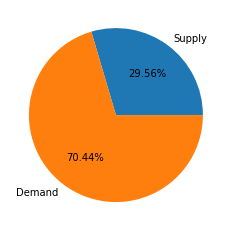

In [26]:
plt.pie(y, labels = x, autopct = '%2.2f%%')

### Convert the hours column to list format

In [27]:
cancelled_hour = cancelled_trips['Request_Hour'].tolist()

In [28]:
notavailable_hour = no_cars_available['Request_Hour'].tolist()

### Plot a histogram to show the time slots when trips got cancelled

In [29]:
range = (0, 23)

In [30]:
bins = 24

In [31]:
def plots(q):
    plt.hist(q, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8)
    plt.xlabel('Time Slots')
    plt.ylabel("Number of Trips")

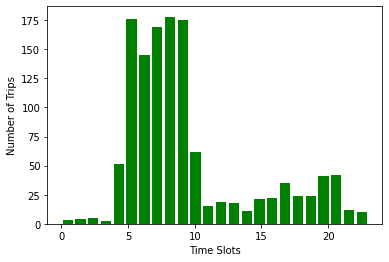

In [32]:
plots(cancelled_hour)

### Plot a histogram to show the time slots when cars were not available

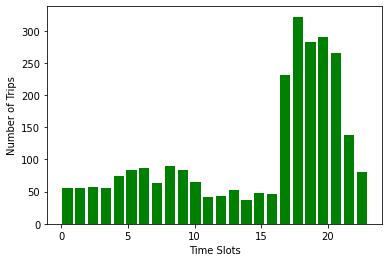

In [33]:
plots(notavailable_hour)

### Filter unsuccesful trips from city to airport

In [34]:
city_to_airport = data[(data.Status != 'Trip Completed') & (data.Pickup_Point == 'City')]

In [35]:
print(city_to_airport.shape)

(2003, 6)


### Filter unsuccessful trips from airport to city

In [36]:
airport_to_city = data[(data.Status != 'Trip Completed') & (data.Pickup_Point == 'Airport')]

In [37]:
print(airport_to_city.shape)

(1911, 6)


### Plot a bar to show the gap between unsuccessful trips from city to airport and from airport to city

In [38]:
p = ["Failed Trips from Airport to City", "Failed Trips from City to Airport"]

In [39]:
q = np.array([1911, 2003])

([<matplotlib.patches.Wedge at 0x7f0f4144a990>,
 [Text(0.04060517048133803, 1.0992502991267192, 'Failed Trips from Airport to City'),
  Text(-0.04060527340057912, -1.0992502953249839, 'Failed Trips from City to Airport')],
 [Text(0.022148274808002556, 0.5995910722509377, '48.82%'),
  Text(-0.022148330945770428, -0.5995910701772639, '51.18%')])

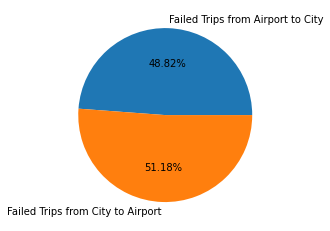

In [40]:
plt.pie(q, labels = p, autopct = '%2.2f%%')

### Filter cancelled trips from city to airport

In [41]:
city_to_airport_cancelled = data[(data.Status == 'Cancelled') & (data.Pickup_Point == 'City')]

### Filter trips from city to airport when cars were not available

In [42]:
city_to_airport_not_available = data[(data.Status == 'No Cars Available') & (data.Pickup_Point == 'City')]

### Filter cancelled trips from airport to city

In [43]:
airport_to_city_cancelled = data[(data.Status == 'Cancelled') & (data.Pickup_Point == 'Airport')]

### Filter trips from airport to city when cars were not available

In [44]:
airport_to_city_not_available = data[(data.Status == 'No Cars Available') & (data.Pickup_Point == 'Airport')]

### Convert the hours column to list format

In [45]:
city_to_airport_cancelled_hour = city_to_airport_cancelled['Request_Hour'].tolist()

### Plot a histogram to show the time slots when trip from city to airport got cancelled

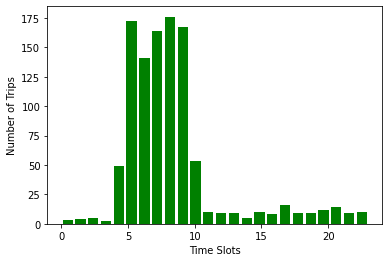

In [46]:
plots(city_to_airport_cancelled_hour)

### Convert the hours column to list format

In [47]:
city_to_airport_not_available_hour = city_to_airport_not_available['Request_Hour'].tolist()

### Plot a histogram to show the time slots when cars were not available for city to airport trip

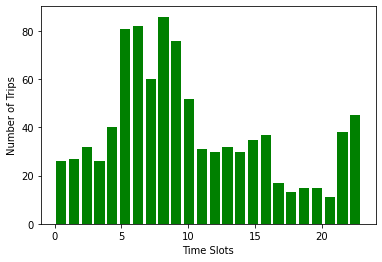

In [48]:
plots(city_to_airport_not_available_hour)

### Convert the hours column to list format

In [49]:
airport_to_city_cancelled_hour = airport_to_city_cancelled['Request_Hour'].tolist()

### Plot a histogram to show the time slots when trip from airport to city got cancelled

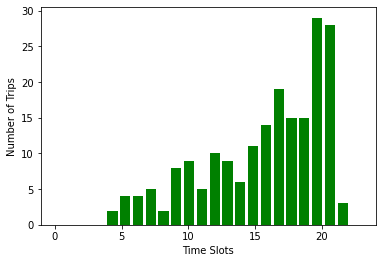

In [50]:
plots(airport_to_city_cancelled_hour)

### Convert the hours column to list format

In [51]:
airport_to_city_not_available_hour = airport_to_city_not_available['Request_Hour'].tolist()

### Plot a histogram to show the time slots when cars were not availabale for airport to city trip

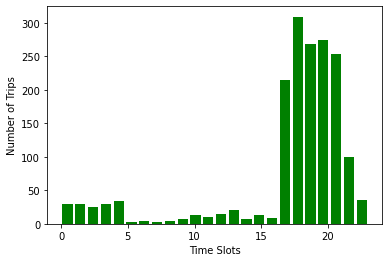

In [52]:
plots(airport_to_city_not_available_hour)

### Conclusion

#### 1. Heavy demand in the city from 4 AM to 11 PM

#### 2. Heavy demand at the airport from 5 PM to 11 PM

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
df= pd.read_csv('Uber_Request_Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [32]:
print(df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [33]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [34]:
df['Driver id'] = df['Driver id'].replace(np.NaN, 0)
df['Drop timestamp'] = df['Drop timestamp'].replace(np.NaN, 0)

In [35]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,0.0,No Cars Available,15-07-2016 23:49:03,0
6741,6752,Airport,0.0,No Cars Available,15-07-2016 23:50:05,0
6742,6751,City,0.0,No Cars Available,15-07-2016 23:52:06,0
6743,6754,City,0.0,No Cars Available,15-07-2016 23:54:39,0
6744,6753,Airport,0.0,No Cars Available,15-07-2016 23:55:03,0


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

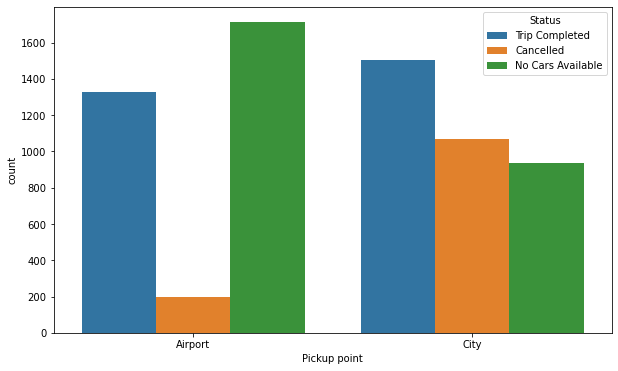

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", data=df, hue='Status')

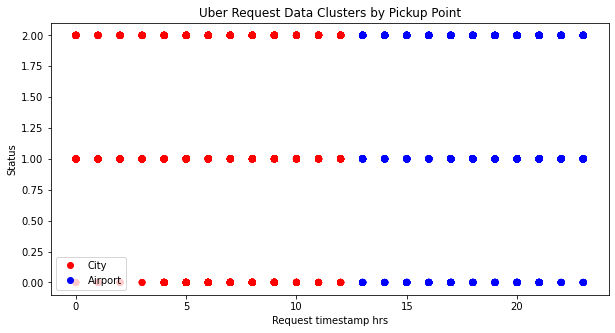

In [40]:
# Convert timestamp to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
# Encode the categorical variable 'Pickup point'
le = LabelEncoder()
df['Pickup point'] = le.fit_transform(df['Pickup point'])
df['Status'] = le.fit_transform(df['Status'])
# Extract hour from timestamp
df['hour'] = df['Request timestamp'].dt.hour 

# Initialize k-means with 2 clusters
kmeans = KMeans(n_clusters=2,init='k-means++')

# Fit the data to the k-means algorithm
kmeans.fit_predict(df[['hour', 'Status', 'Pickup point']])

# Visualize the clusters using a scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
colors = np.array(['r', 'b'])
ax.scatter(df['hour'], df['Status'], c=colors[kmeans.labels_])
ax.set_xlabel('Request timestamp hrs')
ax.set_ylabel('Status')
ax.set_title('Uber Request Data Clusters by Pickup Point')
ax.legend(handles=[plt.Line2D([], [], color=colors[0], marker='o', linestyle='None', label='City'),
                    plt.Line2D([], [], color=colors[1], marker='o', linestyle='None', label='Airport')])
plt.show()

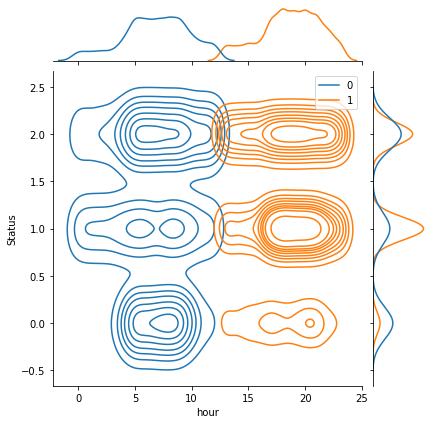

In [42]:
sns.jointplot(x=df['hour'],y=df['Status'],data=df,hue=kmeans.labels_,kind="kde")

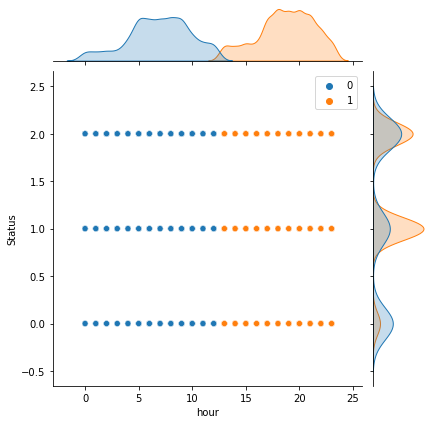

In [43]:
sns.jointplot(data=df, x=df['hour'], y=df['Status'], hue=kmeans.labels_)

In [ ]:
df.tail()